# Importing the Dependencies

In [63]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Data Collection & Processing

In [66]:
#edit data accordingly

basePath = 'C:\\Users\\jayak\\Desktop\\'
calorieFile = 'calories.csv'
exerciseFile = 'exercise.csv'

In [67]:
def printColumns(df):
    for col in df.columns:
        print(col)

In [69]:
calorieData = pd.read_csv(basePath+calorieFile)

In [70]:
calorieData.size

30000

In [71]:
printColumns(calorieData)

User_ID
Calories


In [71]:
exerciseData = pd.read_csv(basePath+exerciseFile)

In [72]:
exerciseData.size

120000

In [73]:
printColumns(exerciseData)

User_ID
Gender
Age
Height
Weight
Duration
Heart_Rate
Body_Temp


# Combining the two Dataframes

In [74]:
calorieData = pd.concat([exerciseData, calorieData['Calories']], axis=1)

In [75]:
calorieData.size

135000

In [76]:
printColumns(calorieData)

User_ID
Gender
Age
Height
Weight
Duration
Heart_Rate
Body_Temp
Calories


# Data Analysis

In [77]:
calorieData.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


# Data Visualization

In [78]:
sb.set()

In [79]:
def distplot(col):
    sb.distplot(calorieData[col])

C:\Users\jayak\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


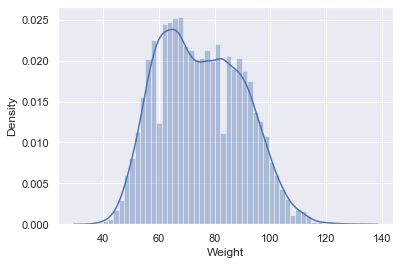

In [80]:
distplot('Weight')

C:\Users\jayak\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


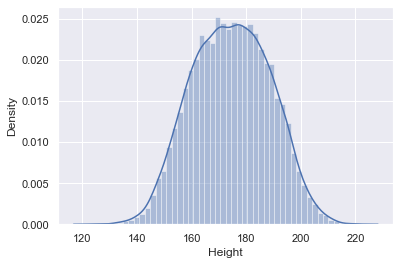

In [81]:
distplot('Height')

# Finding positive and negative correlation in the dataset

1. Positive Correlation
2. Negative Correlation

In [82]:
correlation = calorieData.corr()

<AxesSubplot:>

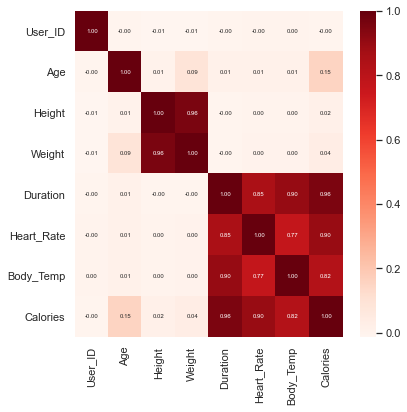

In [83]:
plt.figure(figsize=(6,6))
sb.heatmap(correlation, annot=True, annot_kws={'size':6}, cmap='Reds', fmt='.2f')

Converting the text data to numerical values

In [86]:
calorieData.replace({"Gender":{'male':0,'female':1}}, inplace=True)

# Separating features and Target

In [87]:
X = calorieData.drop(columns=['Calories','User_ID'], axis=1)
Y = calorieData['Calories']

In [88]:
print(X,'\n----------------------------------------------------------\n',Y)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns] 
----------------------------------------------------------
 0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995  

# Splitting the data into training data and test data

In [89]:
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.2, random_state=2)

In [90]:
print(xTrain.describe())

             Gender           Age        Height        Weight      Duration  \
count  12000.000000  12000.000000  12000.000000  12000.000000  12000.000000   
mean       0.504750     42.650750    174.421083     74.909750     15.549583   
std        0.499998     16.950257     14.264661     15.043375      8.326943   
min        0.000000     20.000000    123.000000     36.000000      1.000000   
25%        0.000000     28.000000    164.000000     63.000000      8.000000   
50%        1.000000     39.000000    174.000000     74.000000     16.000000   
75%        1.000000     56.000000    185.000000     86.000000     23.000000   
max        1.000000     79.000000    222.000000    128.000000     30.000000   

        Heart_Rate     Body_Temp  
count  12000.00000  12000.000000  
mean      95.52525     40.028008  
std        9.61825      0.779888  
min       67.00000     37.200000  
25%       88.00000     39.600000  
50%       96.00000     40.200000  
75%      103.00000     40.600000  
max     

In [91]:
print(xTest.describe())

            Gender          Age       Height       Weight     Duration  \
count  3000.000000  3000.000000  3000.000000  3000.000000  3000.000000   
mean      0.498667    43.346000   174.641333    75.195333    15.454667   
std       0.500082    17.091294    14.232904    15.005073     8.289120   
min       0.000000    20.000000   132.000000    41.000000     1.000000   
25%       0.000000    28.000000   164.000000    63.000000     8.000000   
50%       0.000000    40.000000   175.000000    75.000000    15.000000   
75%       1.000000    57.000000   185.000000    87.000000    22.250000   
max       1.000000    79.000000   218.000000   132.000000    30.000000   

        Heart_Rate    Body_Temp  
count  3000.000000  3000.000000  
mean     95.491667    40.015233  
std       9.443887     0.776637  
min      70.000000    37.100000  
25%      88.000000    39.600000  
50%      95.000000    40.200000  
75%     103.000000    40.600000  
max     123.000000    41.500000  


In [92]:
print(yTrain.describe())

count    12000.000000
mean        89.586750
std         62.403301
min          1.000000
25%         35.000000
50%         79.000000
75%        138.000000
max        300.000000
Name: Calories, dtype: float64


In [93]:
print(yTest.describe())

count    3000.000000
mean       89.350667
std        62.681300
min         1.000000
25%        35.000000
50%        78.000000
75%       137.000000
max       314.000000
Name: Calories, dtype: float64


# Training the model

In [94]:
model = XGBRegressor()

In [95]:
model.fit(xTrain, yTrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

# Evaluation

# Test Data prediction

In [96]:
testPrediction = model.predict(xTest)

In [97]:
print('Calories burned test prediction: ',testPrediction)

Calories burned test prediction:  [127.823784 226.00154   38.66253  ... 144.3636    22.767195  89.87375 ]


# Mean Absolute Error

In [98]:
mae = metrics.mean_absolute_error(yTest, testPrediction)

In [99]:
print("MAE: Mean Absolute Error = ", metrics.mean_absolute_error(yTest, testPrediction))

MAE: Mean Absolute Error =  1.4807048829992613


In [104]:
#edit data accordingly

sample = pd.DataFrame({
    'Gender': [0],
    'Age':  [23],
    'Height': [165],
    'Weight': [75],
    'Duration':  [60],
    'Heart_Rate':  [154.0],
    'Body_Temp':  [40.8]
})

print(sample)

   Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0       0   23     165      75        60       154.0       40.8


In [101]:
prediction = model.predict(sample)

In [102]:
print('calories burnt: ',prediction)

calories burnt:  [236.61618]


In [103]:
testPrediction.mean()

89.34229